## Analizando proceso de extracción de letras
De la caja blanca (pistas de auditoría y logs) se obtiene información para el análisis del proceso de extación de letras, ya que es el que más tiempo consume en la extracción de información

In [1]:
import sys
sys.path.append(sys.path[0] + '/..')
from bdd import mongoDB_cliente

auditoria_procesos = mongoDB_cliente.obtenerColeccion('AUDITORIA', {'tipo auditoria': 'Proceso'})   

buscadores = {}
for buscador in ['Lyrics', 'Letras4u', 'Yaletras', 'Cancioneros', 'Google']:
    arreglo = {}
    arreglo["ocurrencia"] = 0
    arreglo["exito"] = 0
    arreglo["fracaso"] = 0
    buscadores[buscador] = arreglo

for auditoria in auditoria_procesos:
    nombre_proceso =  auditoria['nombre']
    if "Extracción Letra" in nombre_proceso: 
        fecha = auditoria['fecha']
        duracion = auditoria['duración']
        caracteristicas = auditoria['caracteristicas']
        
        # por cada buscador de letras de canciones obtiene de la auditoria el total de ocurrencias, exitos y fracasos
        for buscador in buscadores:
            if buscador in nombre_proceso:
                buscadores[buscador]['ocurrencia'] += 1
                if 'resultado:exito' in caracteristicas[0]:
                    buscadores[buscador]['exito'] += 1
                else:
                    buscadores[buscador]['fracaso'] += 1

        # otiene información del proceso general de la extracción de letras
        if "General" in nombre_proceso:
            segundos = duracion.split(' ')
            minutos = round(float(segundos[0]) / 60,2)
            print('Tiempo total en minutos para la Extracción de 100 Letras: ', minutos)

print (buscadores)       

Tiempo total en minutos para la Extracción de 100 Letras:  12.53
{'Lyrics': {'ocurrencia': 100, 'exito': 0, 'fracaso': 100}, 'Letras4u': {'ocurrencia': 100, 'exito': 22, 'fracaso': 78}, 'Yaletras': {'ocurrencia': 78, 'exito': 47, 'fracaso': 31}, 'Cancioneros': {'ocurrencia': 31, 'exito': 14, 'fracaso': 17}, 'Google': {'ocurrencia': 17, 'exito': 15, 'fracaso': 2}}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for buscador in buscadores:
    height = [buscadores[buscador]['ocurrencia'], buscadores[buscador]['exito'], buscadores[buscador]['fracaso']]
    bars = ('Ocurrencia', 'exito', 'fracaso')
    x_pos = np.arange(len(bars))
    plt.title('Sitio Web de: ' + buscador)
    plt.bar(x_pos, height, color=[(0.9, 0.9, 0.9, 1), (0.6, 0.9, 0.1, 0.2), (0.6, 0.1, 0.1, 0.2)],  edgecolor='gray')
    plt.xticks(x_pos, bars)
    plt.show()

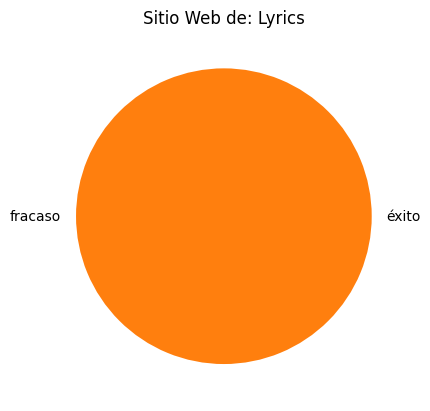

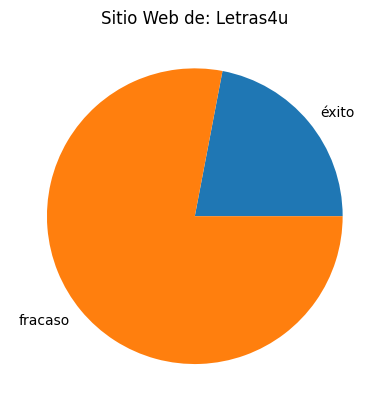

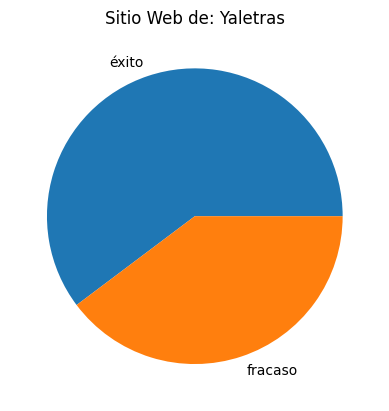

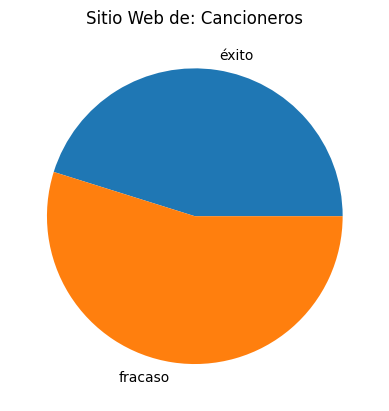

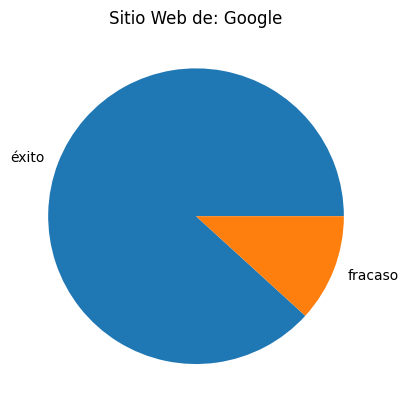

In [4]:
import matplotlib.pyplot as plt
import numpy as np

for buscador in buscadores:
    #fig, ax = plt.subplots()
    #ax.pie([buscadores[buscador]['exito'], buscadores[buscador]['fracaso']])
    plt.title('Sitio Web de: ' + buscador)
    y = np.array([buscadores[buscador]['exito'], buscadores[buscador]['fracaso']])
    mylabels = ["éxito", "fracaso"]
    plt.pie(y, labels = mylabels)
    plt.show()
